In [73]:

import os
os.environ['OMP_NUM_THREADS'] = '1' # 엘보우 방식 그래프 시각화시 경고 대응

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [77]:
df= pd.read_excel('C:/mypycode/project2/final/cal112_kind_of_average.xlsx')
df = df.iloc[:,[1,2,3,4,5,6,7]]
df= df.set_index('지역')
df
                  

,5대범죄 건수 평균,인구밀도 평균,112신고 건수 평균,여성 가구원수 평균,cctv수 평균,가로등수 평균
지역,,,,,,
강남구,7543.571429,6736.714286,170421.428571,261914.571429,869.857143,13837.285714
강동구,4163.714286,13509.142857,89579.714286,212260.000000,319.714286,7724.428571
강북구,3460.714286,11169.571429,74903.428571,154574.000000,428.428571,4388.285714
강서구,4862.000000,18163.000000,114848.000000,287358.857143,323.142857,7849.571429
관악구,5372.428571,21519.571429,112705.000000,253621.857143,536.428571,5190.142857
광진구,4355.857143,25591.714286,86648.571429,181476.857143,404.571429,4857.142857
구로구,4726.428571,22002.714286,86006.571429,212753.428571,429.142857,7669.285714
금천구,3160.857143,18462.857143,63704.285714,120722.142857,308.142857,5243.000000
노원구,4172.857143,13607.428571,89983.428571,265683.714286,309.142857,9302.285714


In [78]:
df1=df[['5대범죄 건수 평균','인구밀도 평균','cctv수 평균','여성 가구원수 평균','가로등수 평균','112신고 건수 평균']]
df1.head()

,5대범죄 건수 평균,인구밀도 평균,cctv수 평균,여성 가구원수 평균,가로등수 평균,112신고 건수 평균
지역,,,,,,
강남구,7543.571429,6736.714286,869.857143,261914.571429,13837.285714,170421.428571
강동구,4163.714286,13509.142857,319.714286,212260.000000,7724.428571,89579.714286
강북구,3460.714286,11169.571429,428.428571,154574.000000,4388.285714,74903.428571
강서구,4862.000000,18163.000000,323.142857,287358.857143,7849.571429,114848.000000
관악구,5372.428571,21519.571429,536.428571,253621.857143,5190.142857,112705.000000


In [79]:
dataset=df1
dataset[:5]

,5대범죄 건수 평균,인구밀도 평균,cctv수 평균,여성 가구원수 평균,가로등수 평균,112신고 건수 평균
지역,,,,,,
강남구,7543.571429,6736.714286,869.857143,261914.571429,13837.285714,170421.428571
강동구,4163.714286,13509.142857,319.714286,212260.000000,7724.428571,89579.714286
강북구,3460.714286,11169.571429,428.428571,154574.000000,4388.285714,74903.428571
강서구,4862.000000,18163.000000,323.142857,287358.857143,7849.571429,114848.000000
관악구,5372.428571,21519.571429,536.428571,253621.857143,5190.142857,112705.000000


In [80]:
X =dataset.iloc[:,:].values # X = dataset.to_numpy() , X = dataset.values
X[:5]

array([[  7543.57142857,   6736.71428571,    869.85714286,
        261914.57142857,  13837.28571429, 170421.42857143],
       [  4163.71428571,  13509.14285714,    319.71428571,
        212260.        ,   7724.42857143,  89579.71428571],
       [  3460.71428571,  11169.57142857,    428.42857143,
        154574.        ,   4388.28571429,  74903.42857143],
       [  4862.        ,  18163.        ,    323.14285714,
        287358.85714286,   7849.57142857, 114848.        ],
       [  5372.42857143,  21519.57142857,    536.42857143,
        253621.85714286,   5190.14285714, 112705.        ]])

In [81]:
#데이터 시각화 한글표시
matplotlib.rcParams['font.family']='Malgun Gothic'

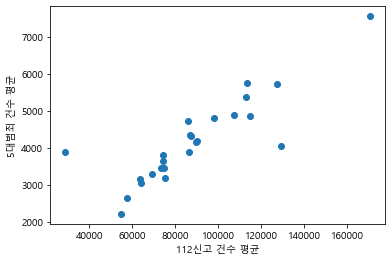

In [82]:
plt.scatter(X[:,5],X[:,0]) #X축 5대범죄 건수 , Y축 인구밀도 평균
plt.xlabel('112신고 건수 평균')
plt.ylabel('5대범죄 건수 평균')
plt.show()

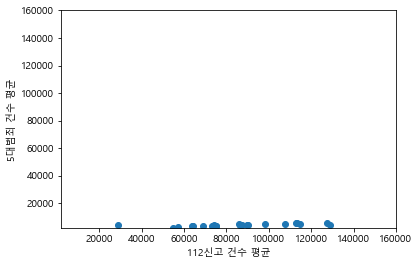

In [83]:
##데이터 축 범위를 동일하게 해야함
plt.scatter(X[:,5],X[:,0]) #X축 5대범죄 건수 , Y축 인구밀도 평균
plt.xlim(2000,160000)
plt.ylim(2000,160000)
plt.xlabel('112신고 건수 평균')
plt.ylabel('5대범죄 건수 평균')
plt.show()

In [84]:
##피처스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 3.0098363 , -2.2658431 ,  3.24658913,  1.14514452,  2.50390165,
         2.86736173],
       [-0.0110575 , -0.8354733 , -0.51653835,  0.31413874,  0.06105128,
         0.0414913 ],
       [-0.63939422, -1.32960215,  0.22709707, -0.65127889, -1.27215472,
        -0.47152704],
       [ 0.61306562,  0.14744392, -0.49308599,  1.57097335,  0.11106149,
         0.92475932],
       [ 1.06928328,  0.8563681 ,  0.96584659,  1.00635984, -0.95171258,
         0.84984948]])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


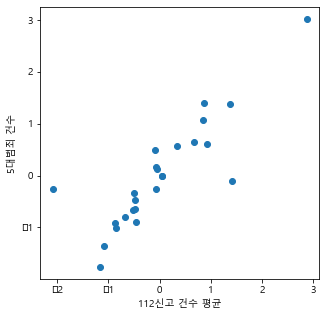

In [85]:
# 스케일링된 데이터 시각화
plt.figure(figsize=(5,5))
plt.scatter(X[:,5],X[:,0]) #X축 5대범죄 건수 , Y축 인구밀도 평균
plt.xlabel('112신고 건수 평균')
plt.ylabel('5대범죄 건수')
plt.show()

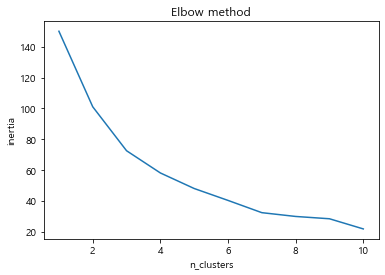

In [95]:
# 최적의 K 값 찾기 (엘보우 방식)
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0) 
    kmeans.fit(X) #학습
    inertia_list.append(kmeans.inertia_)# 각 지점으로부터 클러스터의 중심 까지의 거리의 제곱의합
plt.plot(range(1,11), inertia_list )
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()   # k=3

In [96]:
 #최적의 k값
K = 4 

In [97]:
kmeans =KMeans(n_clusters=K, random_state=0)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 2,
       1, 2, 2])

In [99]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점(centroid) 좌표
centers

array([[ 3.0098363 , -2.2658431 ,  3.24658913,  1.14514452,  2.50390165,
         2.86736173],
       [-0.85759329, -0.39968058, -0.6444406 , -0.78892075, -0.54294064,
        -0.91154034],
       [ 0.11300953,  0.1578709 ,  0.11814129,  0.30308479, -0.19531766,
         0.22976048],
       [ 1.11746299,  1.32283917,  0.37856027,  0.77270826,  1.57545866,
         0.85979185]])

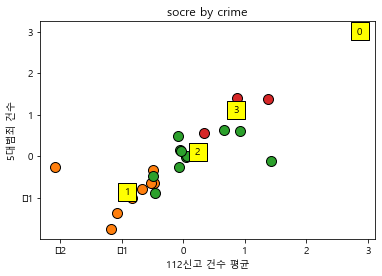

In [102]:
# 데이터시각화(최적의 k)
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 5], X[y_kmeans == cluster, 0],s=100, edgecolor='black') # array 0인것만 추출
    #0은 5대범죄 건수 1은 인구밀도 평균컬럼 
    plt.scatter(centers[cluster, 5], centers[cluster, 0], s=300, edgecolor='black', color='yellow'
               ,marker='s')#중심점 네모
    plt.text(centers[cluster, 5], centers[cluster, 0], cluster, va='center', ha='center')#클러스터 텍스트 출력
plt.title('socre by crime')
plt.xlabel('112신고 건수 평균')
plt.ylabel('5대범죄 건수')
plt.show()

In [91]:
# 데이터 시각화 (스케일링 원복)
X_org = sc.inverse_transform(X) # Feaure scaling 된 데이터 언복
X_org[:5]

array([[  7543.57142857,   6736.71428571,    869.85714286,
        261914.57142857,  13837.28571429, 170421.42857143],
       [  4163.71428571,  13509.14285714,    319.71428571,
        212260.        ,   7724.42857143,  89579.71428571],
       [  3460.71428571,  11169.57142857,    428.42857143,
        154574.        ,   4388.28571429,  74903.42857143],
       [  4862.        ,  18163.        ,    323.14285714,
        287358.85714286,   7849.57142857, 114848.        ],
       [  5372.42857143,  21519.57142857,    536.42857143,
        253621.85714286,   5190.14285714, 112705.        ]])

In [92]:
centers_org=sc.inverse_transform(centers)
centers_org

array([[  7543.57142857,   6736.71428571,    869.85714286,
        261914.57142857,  13837.28571429, 170421.42857143],
       [  3216.58730159,  15572.50793651,    301.01587302,
        146349.57142857,   6213.03174603,  62315.65079365],
       [  4302.52380952,  18212.36904762,    412.5       ,
        211599.5       ,   7082.9047619 ,  94965.66666667],
       [  5426.33333333,  23728.19047619,    450.57142857,
        239660.61904762,  11514.        , 112989.42857143]])

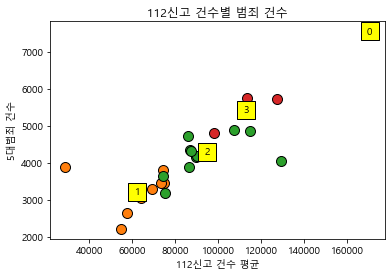

In [93]:
# 원복된 데이터시각화(최적의 k)
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 5], X_org[y_kmeans == cluster, 0],s=100, edgecolor='black') # array 0인것만 추출
    #0은 5대범죄 건수 1은 인구밀도 평균컬럼 
    plt.scatter(centers_org[cluster, 5], centers_org[cluster, 0], s=300, edgecolor='black', color='yellow'
               ,marker='s')#중심점 네모
    plt.text(centers_org[cluster, 5], centers_org[cluster, 0], cluster, va='center', ha='center')#클러스터 텍스트 출력
plt.title('112신고 건수별 범죄 건수')
plt.xlabel('112신고 건수 평균')
plt.ylabel('5대범죄 건수')
plt.show()